# Salary Dataset: Univariate Linear Regression Project

This dataset is derived from [Kaggle](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression)

The dataset is synthetic and was created by the author for teaching and learning purposes. It includes three columns: the row numbers, employees' years of experience, and employees' salaries.

The goal of this project is to demonstrate my proficiency in univariate linear regression. Through my comments, codes, and notes, I aim to highlight my critical and analytical thinking skills, as well as my expertise in exploratory data analysis, building machine learning models, interpreting results, evaluating performance, and deriving actionable insights and recommendations.

### Table of Contents
1. [Imports and Data Loading](#imports)
2. [Data Exploration, Data cleaning, and Model Preparation](#EDA)
3. [Model Construction](#Model)
4. [Model Interpretation and Evaluation](#Interpretation)
5. [Conclusions, Recommendations, and Limitations](#Conclusion)

### Table of Contents
1. [Imports and Data Loading](#imports-and-data-loading)
2. [Data Exploration, Data Cleaning, and Model Preparation](#data-exploration-data-cleaning-and-model-preparation)
3. [Model Construction](#model-construction)
4. [Model Interpretation and Evaluation](#model-interpretation-and-evaluation)
5. [Conclusions, Recommendations, and Limitations](#conclusions-recommendations-and-limitations)


### Imports and Data Loading
<a id="imports-and-data-loading"></a>

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
df = pd.read_csv("C:\\Users\\Azizah\\OneDrive\\Desktop\\Salary Dataset.csv")

In [7]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892


For clarity and improved readability, I will rename the first and second columns. The first column is currently unnamed, so I will rename it to **`#`** to indicate that it represents the row numbers in the dataset, starting from 0. While this column does not serve any significant purpose in the dataset and could be removed, I have chosen to retain it. 

For the second column, **`YearsExperience`** I find that its formatting could be enhanced for better visual appeal. Therefore, I will rename it to **`Years_of_Experience`** to make it more structured and easier to interpret.

In [9]:
df = df.rename(columns={'Unnamed: 0': '#', 'YearsExperience': 'Years_of_Experience'})

### Data Exploration, Data Cleaning, and Model Preparation
<a id="data-exploration-data-cleaning-and-model-preparation"></a>

In [11]:
df.head()

,#,Years_of_Experience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    30 non-null     int64  
 1   Years_of_Experience  30 non-null     float64
 2   Salary               30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 852.0 bytes


The **`info()`** method confirms that the dataset contains no missing values, so there is no need for imputation or handling missing data. However, it is still necessary to check for any duplicate values in the dataset.

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,#,Years_of_Experience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


The summary statistics above show that the values in the dataset appear to be fairly normal without any outliers. However, to confirm this observation, I would visualise the data using some box plots.

<Axes: xlabel='Salary'>

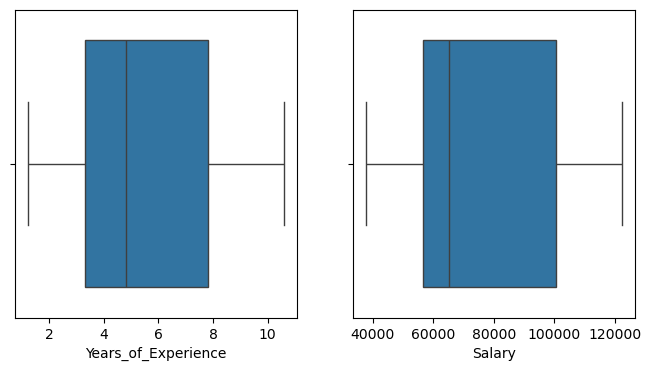

In [17]:
fig, axes = plt.subplots (1, 2,  figsize = (8,4))
sns.boxplot(x = df['Years_of_Experience'], ax = axes[0])
sns.boxplot(x = df['Salary'], ax = axes[1])

These visualisations confirm that both variables **`(Years_of_Experience and Salary)`** exhibit normal distributions without extreme values, as no data points fall outside the whiskers, supporting the earlier summary statistics.

As part of the data exploration process and to assess whether the data satisfies the assumption of linearity, I will now proceed to drop the `#` column since it is not relevant to the analysis.

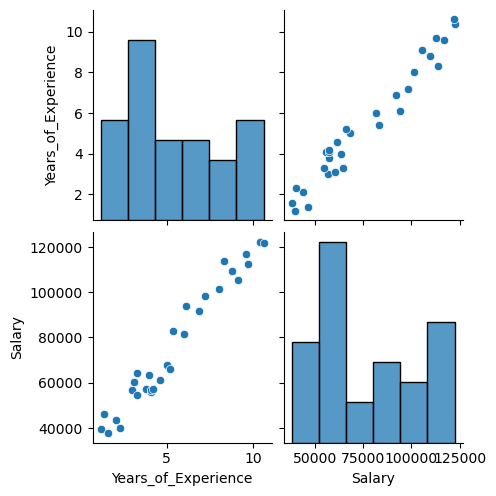

In [20]:
sns.pairplot(df.drop('#', axis = 1))

The scatter plot of **`Salary`** versus **`Years_of_Experience`** shows that the data points tend to cluster around a line, indicating a positive relationship between the two variables. This suggests that the assumption of linearity is satisfied.

Since this dataset is synthetic and the Kaggle description does not provide details about the data collection process, I will assume, for the purposes of this project, that the independent observation assumption holds true and is not violated.

In [22]:
df_x = df[['Years_of_Experience']]
df_y = df[['Salary']]
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.25, random_state = 42)

### Model Construction
<a id="model-construction"></a>

In [39]:
ols_data = pd.concat([X_train, y_train], axis = 1)
ols_formula = 'Salary ~ Years_of_Experience'
OLS = ols(data = ols_data, formula = ols_formula)
model = OLS.fit()

Now that the model has been built and the residuals are available, I can proceed to verify whether the assumptions of homoscedasticity (constant variance) and normality are satisfied.

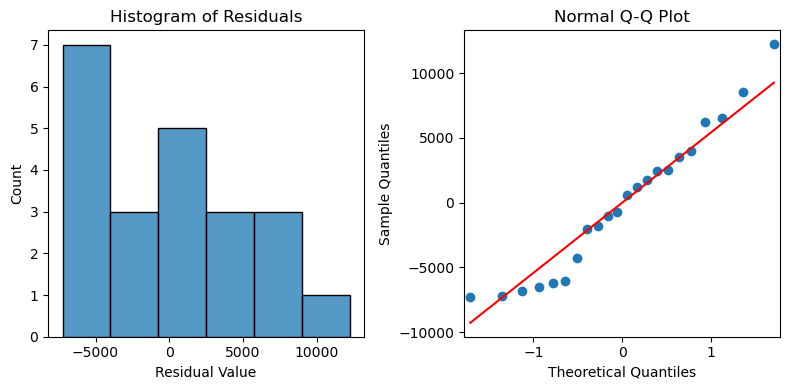

In [86]:
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.histplot(residuals, ax = axes[0])
axes[0].set_xlabel('Residual Value')
axes[0].set_title('Histogram of Residuals')
sm.qqplot(residuals, line = 's', ax = axes[1])
axes[1].set_title('Normal Q-Q Plot')
plt.tight_layout()
plt.show()

I have plotted both a histogram and a Q-Q plot to assess whether the normality assumption is satisfied. Ideally, for the normality assumption, the residuals in a histogram should display a bell-shaped curve, indicating a normal distribution. However, from the results above, the histogram does not exhibit a perfect bell-shaped curve and appears slightly skewed to the right. This suggests that the residuals may not perfectly follow a normal distribution. For further confirmation and easier interpretability, I plotted the Q-Q plot and this shows that the residuals deviate from the red line at both ends (the tails), suggesting potential deviations from normality, particularly in the extremes.

In conclusion, both the histogram and Q-Q plot indicate slight deviations from normality. However, since the sample size is really small (30, 3), mild deviations from normality do not significantly impact the results of the regression model.

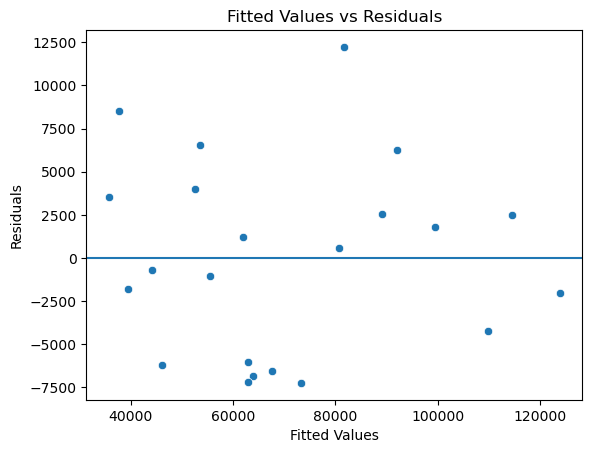

In [84]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title('Fitted Values vs Residuals')
fig.axhline(0)
plt.show()

To assess whether the homoscedasticity assumption is satisfied, I plotted a scatterplot of the model's residuals against the fitted values. Ideally, the residuals should exhibit constant variance across the range of fitted values, forming a random "cloud" of data points without any noticeable increase or decrease in spread.
However, in this plot, the residuals appear to spread out more as the fitted values increase. This suggests the presence of heteroscedasticity (non-constant variance), which violates the assumption of homoscedasticity.

Since both the assumptions of normality and homoscedasticity have been proven to be violated, I will use the feature engineering technique of feature transformation to apply a logarithmic transformation to the target variable **`Salary`**. The transformed variable will serve as the new target variable. I will then rebuild the model and re-evaluate whether the assumptions of normality and homoscedasticity are satisfied.

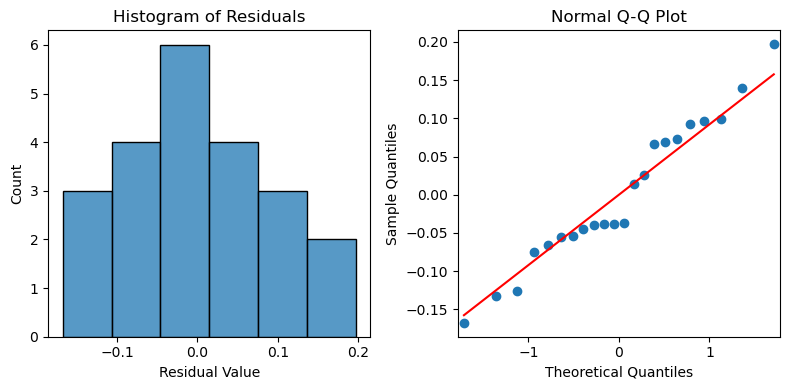

In [109]:
# Feature Engineering - Feature transformation of the target variable
df_y = np.log(df[['Salary']])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.25, random_state = 42)

# Define the OLS formula and fit the model
ols_data = pd.concat([X_train, y_train], axis = 1)
ols_formula = 'Salary ~ Years_of_Experience'
OLS = ols(data = ols_data, formula = ols_formula)
model = OLS.fit()

# Plot histogram and Q-Q plot of residuals
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize=(8,4))
sns.histplot(residuals, ax = axes[0])
axes[0].set_xlabel('Residual Value')
axes[0].set_title('Histogram of Residuals')
sm.qqplot(residuals, line = 's', ax = axes[1])
axes[1].set_title('Normal Q-Q Plot')
plt.tight_layout()
plt.show()

For the histogram, the residuals exhibit a roughly symmetric distribution with a bell-shaped curve, indicating they are close to being normally distributed. However, the curve is not entirely smooth, showing minor deviations from perfect normality.

For the Q-Q plot, the central points (near zero) align well with the red line, suggesting normality in the middle of the distribution. However, the points at the extremes (tails) deviate slightly from the line, indicating minor departures from normality in those regions.

In summary, both plots indicate that the residuals are approximately normal, with minor deviations at the tails. Given the small sample size (30, 3), these slight deviations are unlikely to significantly impact the results of the regression analysis.

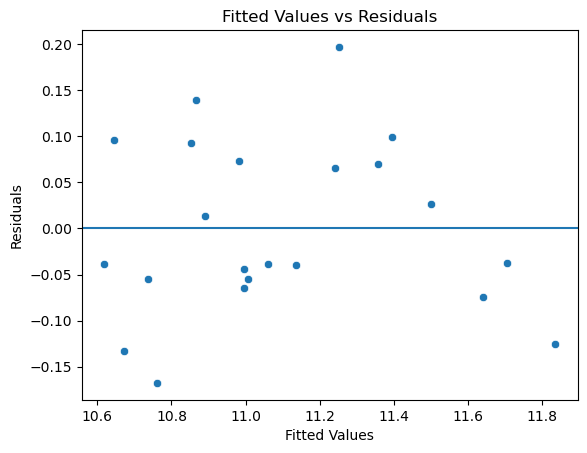

In [106]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title('Fitted Values vs Residuals')
fig.axhline(0)
plt.show()

The residuals are randomly scattered around 𝑦 = 0, with no clear pattern or trend, indicating that the model captures the relationship between the predictor and target variable well. The spread of residuals remains consistent across fitted values, suggesting constant variance and satisfying the homoscedasticity assumption. While a few points deviate further from 𝑦 = 0, they do not significantly impact the overall interpretation.

### Model Interpretation and Evaluation
<a id="model-interpretation-and-evaluation"></a>

<Axes: xlabel='Years_of_Experience', ylabel='Salary'>

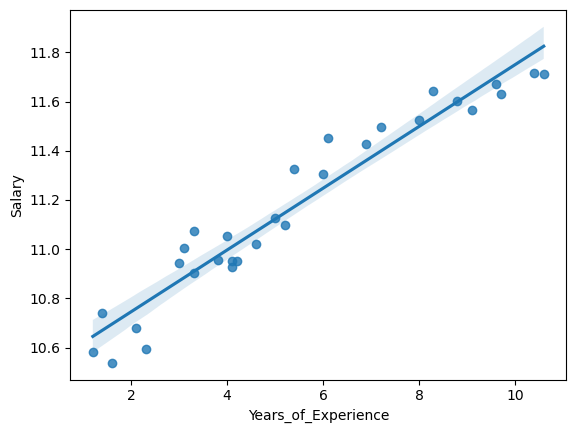

In [113]:
sns.regplot(x = df_x, y = df_y, data = ols_data)

So, the whole point of the OLS function is to find a best-fit line. As above, I have visualised this by plotting the regression line. 

The data points generally follow a positive linear trend, indicating that as years of experience increase, salary tends to increase. The points are fairly close to the regression line, suggesting that the model explains the data well. There is no obvious pattern of deviation that would suggest a poor fit. While most data points align closely with the regression line, a few points are slightly farther from it, indicating minor deviations. However, these deviations are not substantial enough to undermine the model's performance. In conclusion, the plot indicates a strong positive linear relationship between **`Years of Experience`** and **`Salary`**, with the regression model providing a good fit for the data.

The shaded region around the line represents the confidence interval (CI), for the mean predicted salary at each level of years of experience. The confidence interval does not provide information about individual salaries, only the **mean** predicted salary. In this plot, the confidence intervals appear reasonably narrow, indicating that the regression model provides fairly precise estimates of the mean salary based on years of experience.

In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     283.1
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           2.84e-13
Time:                        03:21:43   Log-Likelihood:                 21.261
No. Observations:                  22   AIC:                            -38.52
Df Residuals:                      20   BIC:                            -36.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.4636      0.043    243.717      0.000      10.374      10.553
Years_of_Experience     0.1295      0.008     16.825      0.000       0.113       0.146
==============================================================================
Omnibus:                        0.517   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.772   Jarque-Bera (JB):                0.620
Skew:                           0.216   Prob(JB):                        0.733
Kurtosis:                       2.300   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the summary results, **`y-intercept = 10.4636`**, and **`slope = 0.1295`**, which gives the equation for the best-fit line as:

**`Salary = 0.1295 × Years_of_Experience + 10.4636`**

This means that for every additional year of experience, a person’s salary is expected to increase by 0.1295 (in log scale) on average.

The OLS regression determined the best-fit line with an intercept of 10.4636 and a slope of 0.1295. However, as with any regression model, randomness and variability make it impossible to predict outcomes with absolute certainty.

The coefficient estimate for **`Years_of_Experience`** is 0.1295, with a p-value of 0.000 and a 95% confidence interval ranging from 0.113 to 0.146. The p-value being less than 0.005 indicates that the coefficient is statistically significant. In other words, there is strong evidence to reject the null hypothesis, suggesting that the observed relationship between **`Years_of_Experience`** and **`Salary`** is unlikely due to random chance.

Since this is a univariate linear regression with only one independent variable, the R-squared value is a reliable metric for evaluating the model. The R-squared value of 0.934 indicates that **`Years_of_Experience`** explains approximately 93.4% of the variance in Salary, demonstrating a strong relationship between the two variables.

In [159]:
# More evaluation metrics
y_train_pred = model.predict(ols_data)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Set Metrics:")
print(' ')
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R-squared (Training Set): {r2_train:.4f}")

Training Set Metrics:
 
Mean Squared Error (MSE): 0.0085
Root Mean Squared Error (RMSE): 0.0921
Mean Absolute Error (MAE): 0.0794
R-squared (Training Set): 0.9340


In [161]:
# Prepare the test data for prediction
ols_test_data = pd.concat([X_test, y_test], axis=1)

# Generate predictions for the test set
y_pred = model.predict(ols_test_data)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Test Set Metrics:")
print(' ')
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (Test Set): {r2:.4f}")

Test Set Metrics:
 
Mean Squared Error (MSE): 0.0110
Root Mean Squared Error (RMSE): 0.1051
Mean Absolute Error (MAE): 0.0814
R-squared (Test Set): 0.8612


For the training set metrics, MSE = 0.0085, RMSE = 0.0921, MAE = 0.0794 and R-squared = 0.9340. These indicate a good fit on the training set. The errors (MSE, RMSE, MAE) are small, and the R-squared value shows that about 93.4% of the variance in the target variable is explained by the model.

For the test set metrics, MSE = 0.0110, RMSE = 0.1051, MAE = 0.0814, R-squared = 0.8612. The test set metrics show slightly higher errors and a lower R-squared value (86.12%). This suggests that the model's predictions are less accurate on unseen data compared to the training set.

The errors are slightly higher on the test set compared to the training set, which is expected. However, the difference is small, indicating that the model generalises reasonably well to new data. 

The R-squared for the test set is lower than the training set. This drop is normal, as the model may not capture all variance in unseen data as effectively as it does for the training set. However, the R-squared value for the test set is still relatively high, demonstrating that the model explains a good portion of the variance.

The model performs well overall, as indicated by relatively low errors and high R-squared values on both the training and test sets. The small increase in error and the slight drop in R-squared on the test set suggest the model is not overfitting, which is a positive outcome.

### Conclusions, Recommendations, and Limitations
<a id="conclusions-recommendations-and-limitations"></a>

- The regression analysis indicates a strong linear relationship between years of experience and salary.
- The regression model predicts that for every additional year of experience, salary increases by approximately 0.1295 (log scale) on average.
- The model explains a significant proportion of the variance in salary, as evidenced by an R-squared of 0.934 on the training set and 0.861 on the test set.
- The error metrics (MSE, RMSE, MAE) for the training and test sets are low and close in value, suggesting that the model generalises well to unseen data without overfitting. However, there is still a slight drop in performance on the test set, which is expected.
- The p-value for the slope coefficient (0.000) indicates that the relationship between years of experience and salary is statistically significant and not due to random chance.
- The 95% confidence interval for the slope (0.113 to 0.146) reinforces the reliability of the model’s predictions.
- As this is a univariate regression model, meaning it only considers one variable - `Years_of_Experience` as a predictor of `Salary`. Other factors influencing salary, such as Education Level, Industry, Location or Cost of Living, and Job Performance Ratings, are not included in this analysis.
- The predicted increase in salary is in logarithmic scale and might require transformation to interpret actual salary increments.